### Want to make plots for my Allen Presentation.

In [119]:
import csv
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pickle
%matplotlib inline

In [120]:
run_date = '062119/'
location_to_save = os.path.join('/Users/mialydefelice/Dropbox/papers/NSF_Grant_2019/Figures/Figure3', 'sub_gen_plots/', run_date)
genes_filename = 'genes.tsv'
subgen_data_filename = 'SubGenData.tsv'
data_directory = '/Users/mialydefelice/Dropbox/Mialy/Modeling/TranscriptionUnitStructure/2019/WCM_FlatFiles'

In [121]:
genes_to_pull = ['idnK', 'lacZ', 'lsrR', 'sieB']

In [122]:
fullFilename = location_to_save +  'BurstPlots'
directory = os.path.join(location_to_save, 'BurstPlots')

if not os.path.exists(directory):
    os.makedirs(directory)


In [123]:
subgen_data_path = os.path.join(data_directory, 'SubgenerationalPlotData', subgen_data_filename)
genes_model_path = os.path.join(data_directory,'reconstruction', genes_filename)

In [124]:
#Load in Data
genesWC = pd.read_csv(genes_model_path, sep='\t', index_col=False)
sub_gen_data = pd.read_csv(subgen_data_path, sep = '\t', index_col = False)

In [125]:
def gather_protein_rna_ids(genes):
    eco_cyc_ids= []
    monomer_ids = []
    rna_ids = []
    for gene in genes_to_pull:
        eco_cyc_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'id'].tolist())
        monomer_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'monomerId'].tolist())
        rna_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'rnaId'].tolist())
    return rna_ids, monomer_ids

In [134]:
def gather_protein_rna_ids_locs(genes):
    monomer_ids, rna_ids = gather_protein_rna_ids(genes)
    monomer_id_locs = []
    rna_id_locs = []
    for monomer_id in monomer_ids:
        monomer_id_locs.append([col for col in sub_gen_data.columns if monomer_id[0] in col])
    for rna_id in rna_ids:
        rna_id_locs.append(rna_id[0] + '[c]')
    plot_types = ['RNA', 'protein'] #indicates the order the data is output.
    return rna_id_locs, monomer_id_locs, plot_types

In [127]:
def plot_counts(data, id_to_plot, gene_name, line_color, plot_type, output_path):
    '''
    data: dataframe containing sub-gen data
    id_to_plot: depending on if its an RNA or protiein, will be either the monomer id with location
        tag, or rna_id with the location tag.
    line_color: want to plot RNA and protein in differnet colors, specify that color here.
    plot_type: string stating if we are plotting a protein or rna, will end up in the plot name
    '''
    plt.figure(figsize=(5,3))
    sns.set_style('ticks')
    for gen in np.unique(data['gen']):
        df_gen = data[data['gen']==gen]
        plt.plot(df_gen['time']/60, df_gen[id_to_plot], color = line_color, alpha = 0.8, linewidth = 3)
    custom_lines = [Line2D([0], [0], color = line_color, lw=8)]
    sns.despine()
    plt.savefig(os.path.join(output_path, gene_name + '_plot_' + plot_type + '.pdf'))
    plt.show()
    

In [135]:
ids_locs= gather_protein_rna_ids_locs(genes_to_pull)
ids_locs

(['EG12152_RNA[c]', 'EG10527_RNA[c]', 'G6799_RNA[c]', 'EG12154_RNA[c]'],
 [['GLUCONOKINI-MONOMER[c]'],
  ['BETAGALACTOSID-MONOMER[c]'],
  ['G6799-MONOMER[c]'],
  ['EG12154-MONOMER[i]']],
 ['RNA', 'protein'])

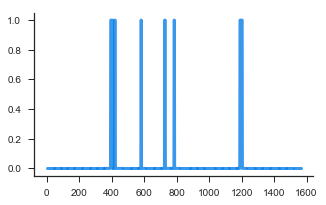

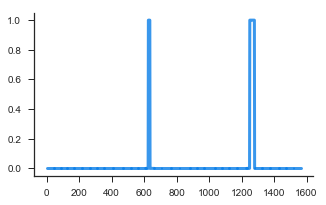

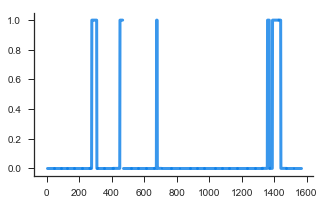

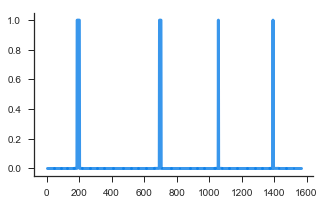

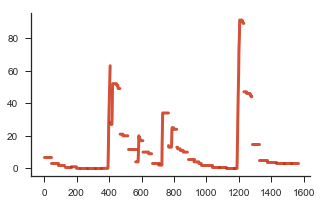

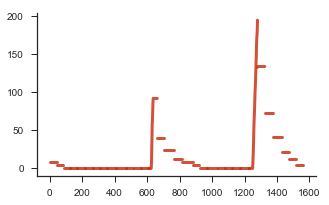

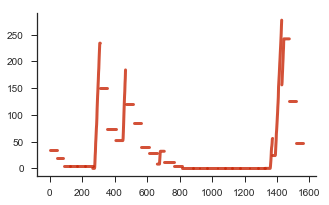

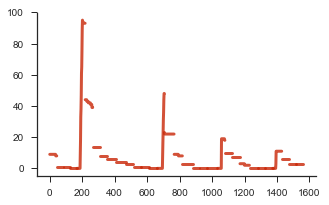

In [139]:

colors = ['#077de8', '#c82606']
for i in range(0, len(ids_locs)-1):
    gene_count = 0
    for id_loc in ids_locs[i]:
        plot_counts(sub_gen_data, id_loc, genes_to_pull[gene_count], colors[i], 
                    ids_locs[2][i], directory)
        gene_count += 1
       

In [138]:
len(ids_locs)-1


2

In [ ]:
for rna in rna_id_locs:
        plot_counts(sub_gen_data, rna, genes_to_pull[gene_count], '#077de8', 'rna', directory)
    for protein in monomer_id_locs:
        plot_counts(sub_gen_data, protein, genes_to_pull[gene_count], '#c82606', 'protein', directory)
        gene_count += 1

In [ ]:
eco_cyc_ids= []
monomer_ids = []
rna_ids = []
for gene in genes_to_pull:
    eco_cyc_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'id'].tolist())
    monomer_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'monomerId'].tolist())
    rna_ids.append(genesWC.loc[(genesWC['symbol'] == gene), 'rnaId'].tolist())
eco_cyc_ids
monomer_ids

In [86]:
all_monomer_id_locs = []
all_rna_id_locs = []
for monomer_id in monomer_ids:
    all_monomer_id_locs.append([col for col in sub_gen_data.columns if monomer_id[0] in col])
for rna_id in rna_ids:
    all_rna_id_locs.append(rna_id[0] + '[c]')

In [87]:
all_monomer_id_locs

[['GLUCONOKINI-MONOMER[c]'],
 ['BETAGALACTOSID-MONOMER[c]'],
 ['G6799-MONOMER[c]'],
 ['EG12154-MONOMER[i]']]

In [88]:
all_rna_id_locs

['EG12152_RNA[c]', 'EG10527_RNA[c]', 'G6799_RNA[c]', 'EG12154_RNA[c]']

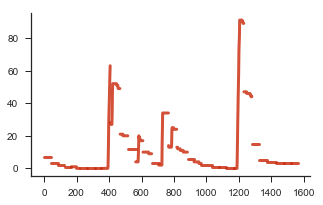

In [82]:
plt.figure(figsize=(5,3))
sns.set_style('ticks')


for gen in np.unique(subGenData['gen']):
    df_gen = subGenData[subGenData['gen']==gen]
    plt.plot(df_gen['time']/60, df_gen['GLUCONOKINI-MONOMER[c]'], color = '#c82606', alpha = 0.8, linewidth = 3, label = 'chpB')
custom_lines = [Line2D([0], [0], color = '#c82606', lw=8)]

sns.despine()
plt.show()

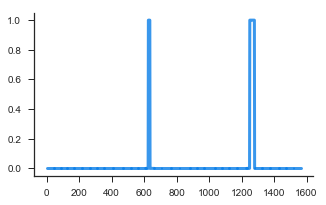

In [83]:
plt.figure(figsize=(5,3))
sns.set_style('ticks')

for gen in np.unique(subGenData['gen']):
    df_gen = subGenData[subGenData['gen']==gen]
    plt.plot(df_gen['time']/60.0, df_gen['EG10527_RNA[c]'], color = '#077de8', alpha = 0.8, linewidth = 3)
    
custom_lines = [Line2D([0], [0], color = '#077de8', lw=8)]
sns.despine()
plt.show()